In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file (using forward slashes)
data = pd.read_csv("D:/all xerox/titanic.csv")

# ... rest of your code
# Check for missing values
print(data.isnull().sum())
def load_data(filepath):
  """
  Loads data from a CSV file.

  Args:
      filepath (str): Path to the CSV file.

  Returns:
      pandas.DataFrame: The loaded DataFrame.
  """
  return pd.read_csv(filepath)

# Example usage
data = load_data("D:/all xerox/titanic.csv")
print(data)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  2

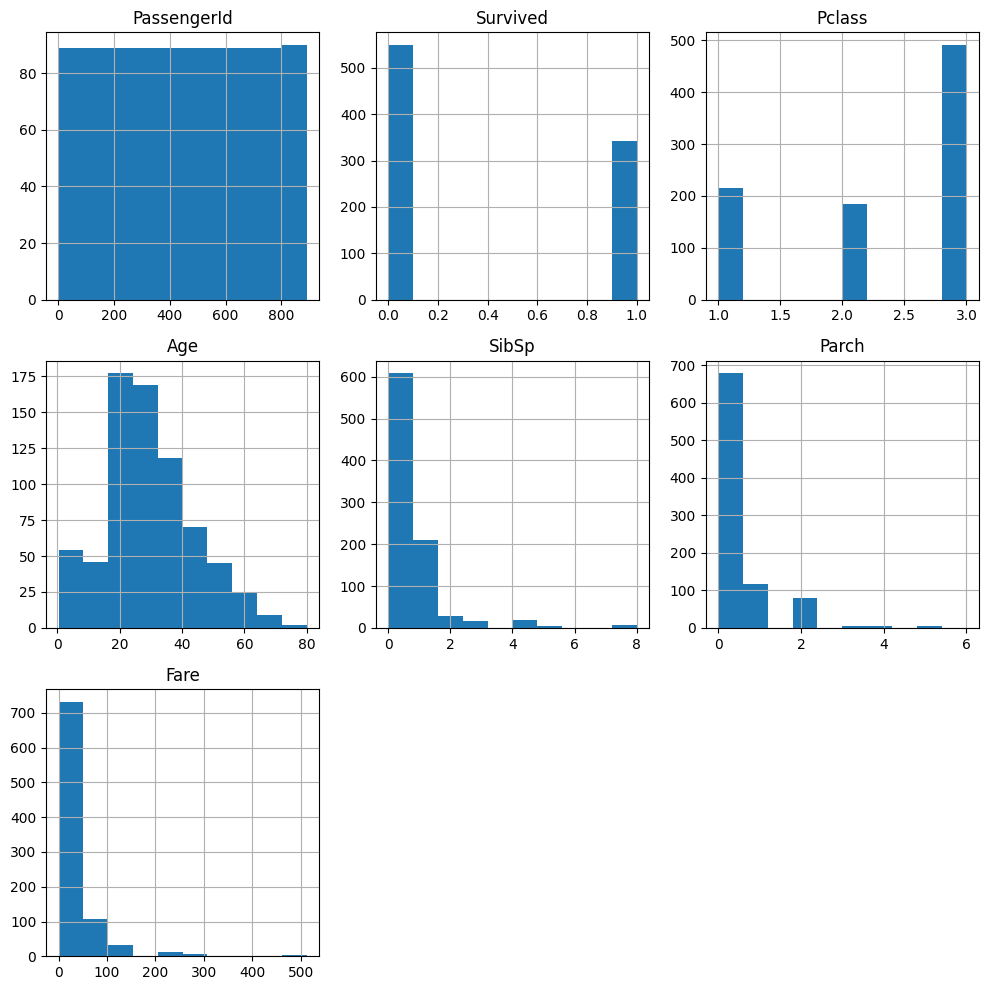

In [10]:

# Analyze distribution of numerical features
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

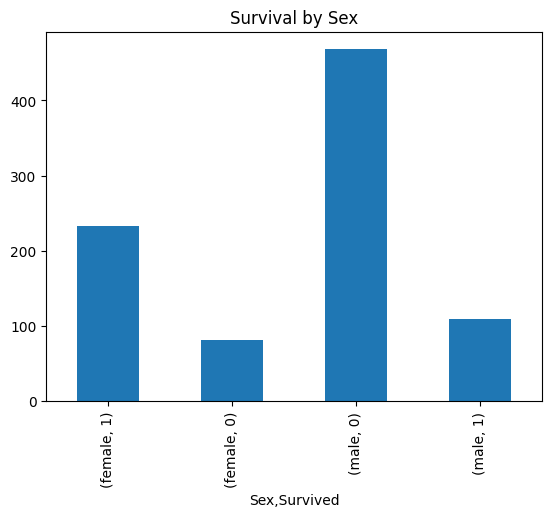

In [18]:
# Analyze categorical features
data.groupby("Sex")["Survived"].value_counts().plot(kind="bar")
plt.title("Survival by Sex")
plt.show()


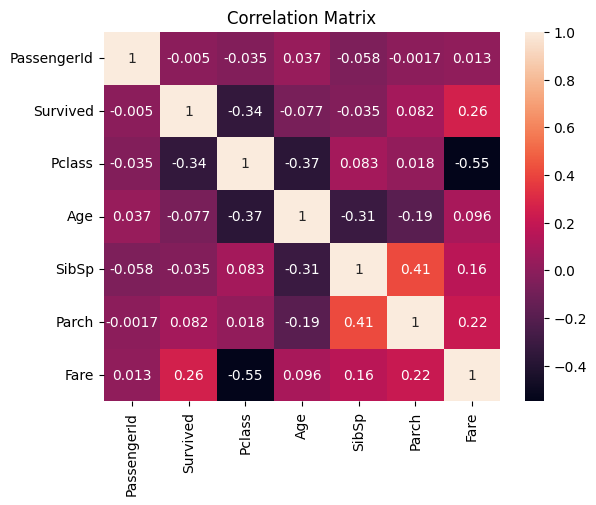

In [14]:
# Identify the column with strings (replace 'Name' if needed)
string_column = data.select_dtypes(include=['object']).columns[0]

# Option 1a: Drop rows with missing values
# data.dropna(subset=[string_column], inplace=True)

# Option 1b: Impute missing values (example: replace with mean of the column)
# data[string_column] = data[string_column].fillna(data[string_column].mean())

# Correlation analysis (after handling missing values)
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix")
plt.show()

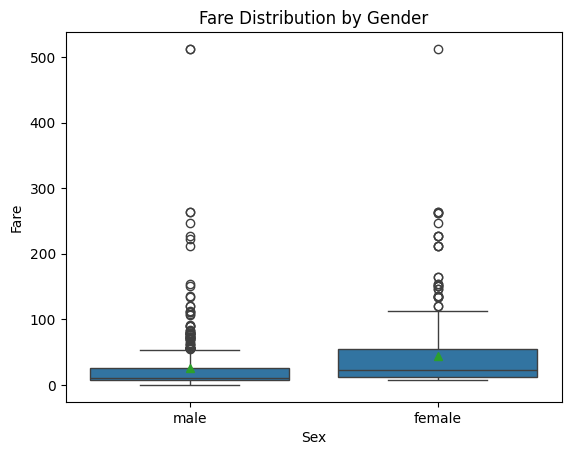

In [16]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1  # Adding 1 to include the passenger themselves
data["Age_bin"] = pd.cut(data["Age"], bins=[0, 18, 65, 80], labels=["Child", "Adult", "Elderly"])
sns.boxplot(
    x = "Sex",
    y = "Fare",
    showmeans=True,
    data=data
)
plt.title("Fare Distribution by Gender")
plt.show()


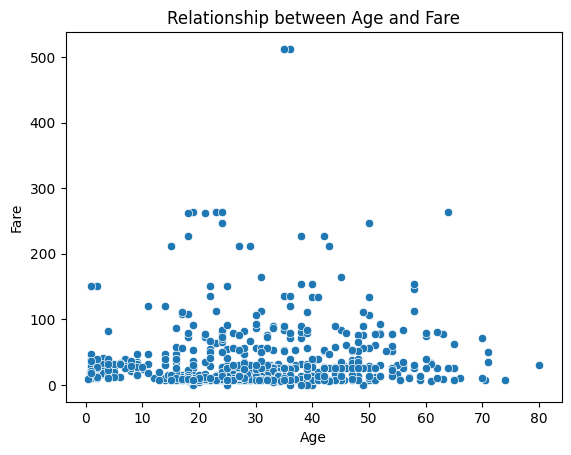

In [17]:
sns.scatterplot(
    x = "Age",
    y = "Fare",
    data=data
)
plt.title("Relationship between Age and Fare")
plt.show()


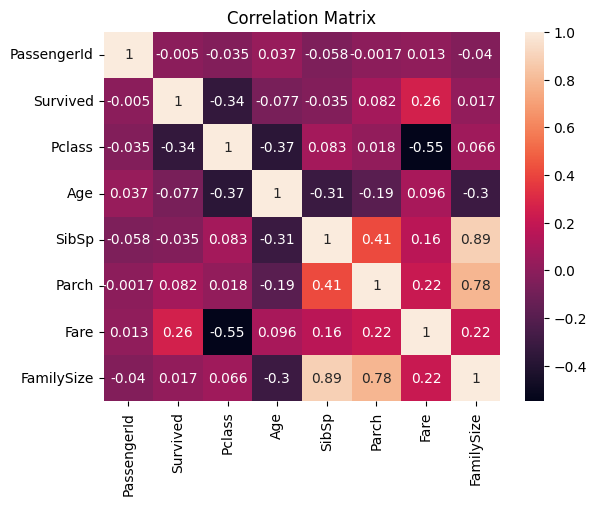

In [20]:
def correlation_analysis(data):
  """
  Calculates and visualizes the correlation matrix for numerical features.

  Args:
      data (pandas.DataFrame): The DataFrame containing numerical features.
  """
  correlation = data.corr(numeric_only=True)
  sns.heatmap(correlation, annot=True)
  plt.title("Correlation Matrix")
  plt.show()

# Example usage (assuming data already has missing values dropped)
correlation_analysis(data)